In [2]:
# CLO2.2 – Descriptive Statistics Function

def Desc_stat(ds, math_col):
    col = ds[math_col]

    mean = col.mean()
    median = col.median()
    mode = col.mode()[0]
    minimum = col.min()
    maximum = col.max()
    range_ = maximum - minimum
    std_dev = col.std()
    variance = col.var()
    skew = col.skew()
    kurtosis = col.kurt()
    count = col.count()

    Quart = [
        col.quantile(0.00),
        col.quantile(0.25),
        col.quantile(0.50),
        col.quantile(0.75),
        col.quantile(1.00),
        col.quantile(0.75) - col.quantile(0.25)  # IQR
    ]
    summary = {
        "Average": mean,
        "Median": median,
        "Mode": mode,
        "Minimum": minimum,
        "Maximum": maximum,
        "Range": range_,
        "Standard Deviation": std_dev,
        "Variance": variance,
        "Skewness": skew,
        "Kurtosis": kurtosis,
        "0th Percentile": Quart[0],
        "25th Percentile": Quart[1],
        "50th Percentile": Quart[2],
        "75th Percentile": Quart[3],
        "100th Percentile": Quart[4],
        "Interquartile Range (IQR)": Quart[5],
        "Count": count
    }

    return summary


In [3]:
# CLO2.3 – Random Sampling of size 150
data = pd.read_csv("StudentsPerformance.csv")

sample_size = 150
random_sample = data.sample(n=sample_size, replace=False, random_state=42)

# Apply the function to 'math score'
print("Random Sample – math score")
Desc_stat(random_sample, "math score")

Random Sample – math score


{'Average': 63.693333333333335,
 'Median': 65.0,
 'Mode': 45,
 'Minimum': 0,
 'Maximum': 100,
 'Range': 100,
 'Standard Deviation': 16.238138331265827,
 'Variance': 263.6771364653245,
 'Skewness': -0.6596247506977653,
 'Kurtosis': 0.8830720679985937,
 '0th Percentile': 0.0,
 '25th Percentile': 54.0,
 '50th Percentile': 65.0,
 '75th Percentile': 75.0,
 '100th Percentile': 100.0,
 'Interquartile Range (IQR)': 21.0,
 'Count': 150}

In [4]:
# CLO2.4 – Systematic Sampling with condition

#math score >= 60
condition_df = data[data["math score"] >= 60].reset_index(drop=True)

# Systematic: 
systematic_sample = condition_df.iloc[::3]

print("Systematic Sample size:", len(systematic_sample))
print("Systematic Sample – math score")
Desc_stat(systematic_sample, "math score")

Systematic Sample size: 226
Systematic Sample – math score


{'Average': 73.60619469026548,
 'Median': 72.0,
 'Mode': 63,
 'Minimum': 60,
 'Maximum': 100,
 'Range': 40,
 'Standard Deviation': 9.538215842350214,
 'Variance': 90.97756145526058,
 'Skewness': 0.6901356057824425,
 'Kurtosis': -0.19560234816778532,
 '0th Percentile': 60.0,
 '25th Percentile': 65.0,
 '50th Percentile': 72.0,
 '75th Percentile': 79.75,
 '100th Percentile': 100.0,
 'Interquartile Range (IQR)': 14.75,
 'Count': 226}

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("StudentsPerformance.csv")

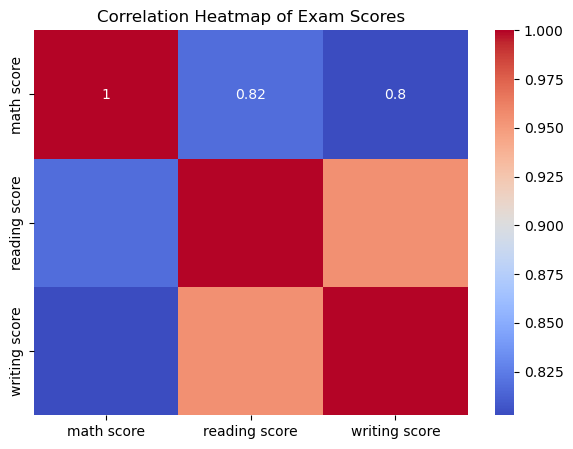

In [6]:
plt.figure(figsize=(7,5))
corr = data[["math score", "reading score", "writing score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Exam Scores")
plt.show()

In [7]:
from scipy.stats import pearsonr
import pandas as pd

data = pd.read_csv("StudentsPerformance.csv")

pearson_corr, p_value = pearsonr(data["math score"], data["reading score"])

print("Pearson Correlation:", pearson_corr)
print("P-value:", p_value)

Pearson Correlation: 0.817579663672054
P-value: 1.7877531099061487e-241


In [8]:
from scipy.stats import spearmanr

spearman_corr, p_value = spearmanr(data["math score"], data["reading score"])

print("Spearman Correlation:", spearman_corr)
print("P-value:", p_value)


Spearman Correlation: 0.8040638885551747
P-value: 1.3538514946746025e-227


In [9]:
from scipy.stats import chi2_contingency
import pandas as pd

data = pd.read_csv("StudentsPerformance.csv")

# Categorize math scores into bins
data["math_category"] = pd.cut(data["math score"], bins=3, labels=["Low", "Medium", "High"])

# create contingency table
table = pd.crosstab(data["gender"], data["math_category"])

chi2, p, dof, expected = chi2_contingency(table)

print("Chi-Square:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency:", expected)


Chi-Square: 22.759666605099284
P-value: 1.1423552757068884e-05
Degrees of Freedom: 2
Expected Frequency: [[ 10.36  252.266 255.374]
 [  9.64  234.734 237.626]]
